In [1]:
import random
import math

In [3]:
def bootstrap(x):
	samp_x = []
	for i in range(len(x)):
		samp_x.append(random.choice(x))
	return samp_x

# subtracts group a mean from group b mean and returns result
def meandiff(grpA, grpB):
	return sum(grpB) / float(len(grpB)) - sum(grpA) / float(len(grpA))

In [7]:
Drug=[54, 73, 53, 70, 73, 68, 52, 65, 65]
placebo=[54, 51, 58 ,44, 55, 52, 42, 47, 58, 46]

In [10]:
samples = []
samples.append(placebo)

samples.append(Drug)


In [11]:
a=0
b=1
conf_interval = 0.9

In [12]:
observed_mean_diff = meandiff(samples[a], samples[b])

num_resamples = 10000   # number of times we will resample from our original samples
out = []                # will store results of each time we resample

for i in range(num_resamples):
	# get bootstrap samples for each of our groups
	# then compute our statistic of interest
	# append statistic to out
	bootstrap_samples = []  # list of lists
	for sample in samples:
		bootstrap_samples.append(bootstrap(sample))
	# now we have a list of bootstrap samples, run meandiff
	out.append(meandiff(bootstrap_samples[a], bootstrap_samples[b]))

out.sort()

tails = (1 - conf_interval) / 2

# in case our lower and upper bounds are not integers,
# we decrease the range (the values we include in our interval),
# so that we can keep the same level of confidence
lower_bound = int(math.ceil(num_resamples * tails))
upper_bound = int(math.floor(num_resamples * (1 - tails)))

######################################
#
# Output
#
######################################

# print observed value and then confidence interval
print ("Observed difference between the means: %.2f" % observed_mean_diff)
print ("We have", conf_interval * 100, "% confidence that the true difference between the means")
print ("is between: %.2f" % out[lower_bound], "and %.2f" % out[upper_bound])

Observed difference between the means: 12.97
We have 90.0 % confidence that the true difference between the means
is between: 7.62 and 18.02


In [14]:
import pandas as pd
outpandas=pd.Series(out)

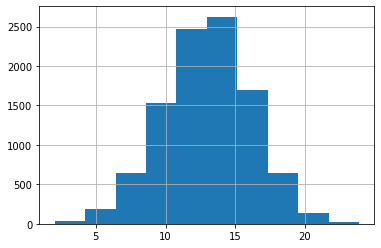

In [18]:
%matplotlib inline
outpandas.hist()